## Análise exploratória: *visualização dos dados do ENEM 2016*

In [2]:
library(tidyverse)

options(repr.matrix.max.cols=200, repr.matrix.max.rows=100)

In [3]:
df <- read_csv('dadosEnem2016.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  ano = col_double(),
  idade = col_double(),
  anoConcEm = col_double(),
  nota_cn = col_double(),
  nota_ch = col_double(),
  nota_lc = col_double(),
  nota_mt = col_double(),
  nota_reda1 = col_double(),
  nota_reda2 = col_double(),
  nota_reda3 = col_double(),
  nota_reda4 = col_double(),
  nota_reda5 = col_double(),
  nota_redaTot = col_double(),
  sociEco_escPai = col_double(),
  sociEco_escMae = col_double(),
  sociEco_ocupPai = col_double(),
  sociEco_ocupMae = col_double(),
  sociEco_numPessRes = col_double(),
  sociEco_renda = col_double()
)

See spec(...) for full column specifications.



In [4]:
glimpse(df)

Observations: 13,730
Variables: 38
$ id                 <chr> "ed50e8aaa58e7a806c337585efee9ca41f1eb1ad", "2c3...
$ ano                <dbl> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, ...
$ cidade             <chr> "Porto Alegre", "Granja", "Fortaleza", "Rio de J...
$ estado             <chr> "RS", "CE", "CE", "RJ", "AM", "BA", "MT", "RS", ...
$ idade              <dbl> 24, 17, 21, 25, 28, 18, 18, 18, 16, 24, 29, 17, ...
$ sexo               <chr> "M", "F", "F", "F", "M", "F", "F", "F", "F", "M"...
$ estCivil           <chr> "solteiro", "solteiro", "solteiro", "solteiro", ...
$ raca               <chr> "branca", "parda", "parda", "naoDeclarado", "pre...
$ nacion             <chr> "br", "br", "br", "br", "br", "br", "br", "br", ...
$ concluEm           <chr> "concluiu", "concluira2016", "concluiraApos2016"...
$ anoConcEm          <dbl> 2012, 2006, 2006, 2007, 2012, 2015, 2006, 2015, ...
$ escTipo            <chr> "naoDisse", "publica", "naoDisse", "naoDisse", "...
$ escInst        

In [5]:
descricaoDf <- read_csv('descricaoColunasEnem2016.csv')

Parsed with column specification:
cols(
  nome_coluna = col_character(),
  descricao_colua = col_character()
)



In [7]:
head(descricaoDf, 100)

nome_coluna,descricao_colua
<chr>,<chr>
id,Número de inscrição
ano,Ano do Enem
cidade,Nome do município de residência
estado,Sigla da Unidade da Federação de residência
idade,idade
sexo,sexo
estCivil,Estado Civil
raca,Cor/raça
nacion,nacionalidade


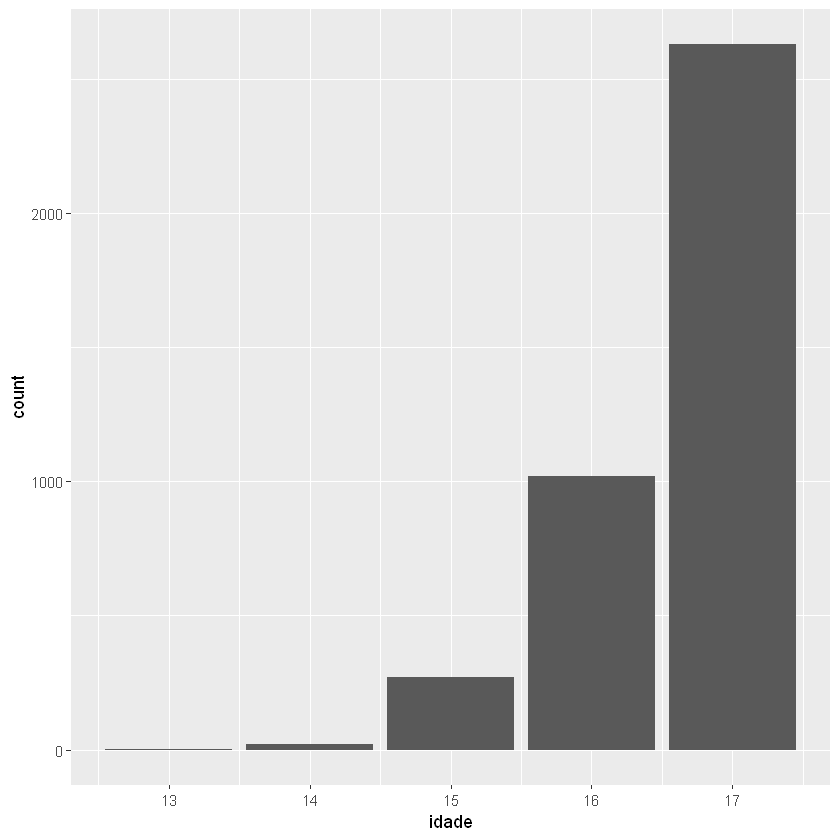

In [11]:
df %>% 
    filter(idade<18) %>% 
    ggplot(aes(idade))+
    geom_bar()

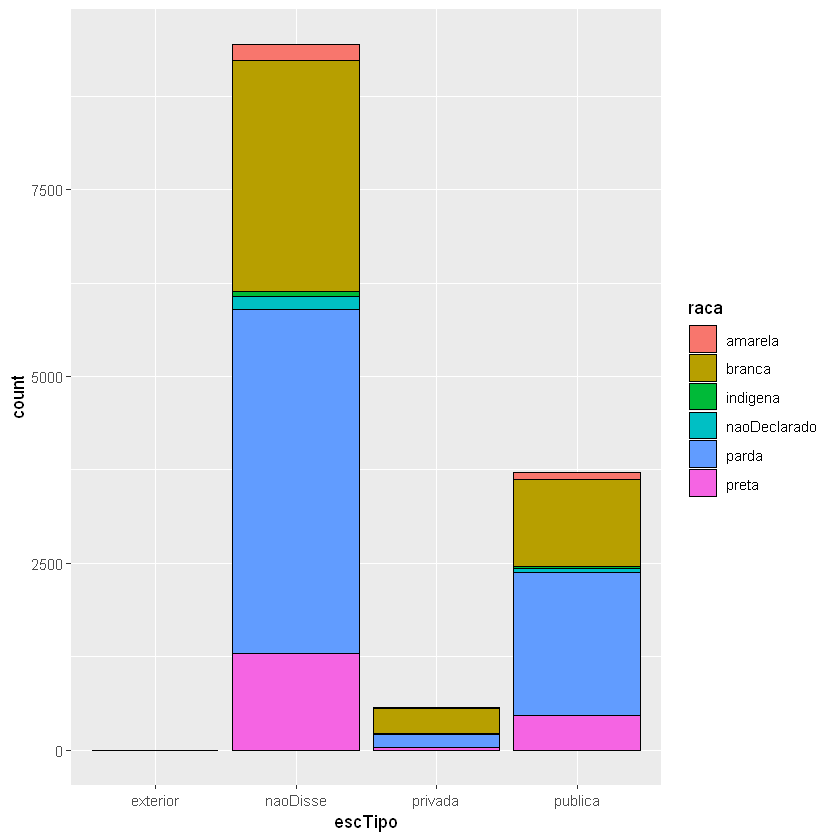

In [19]:
df %>% 
    ggplot(aes(escTipo, fill=raca))+
    geom_bar(col='black')


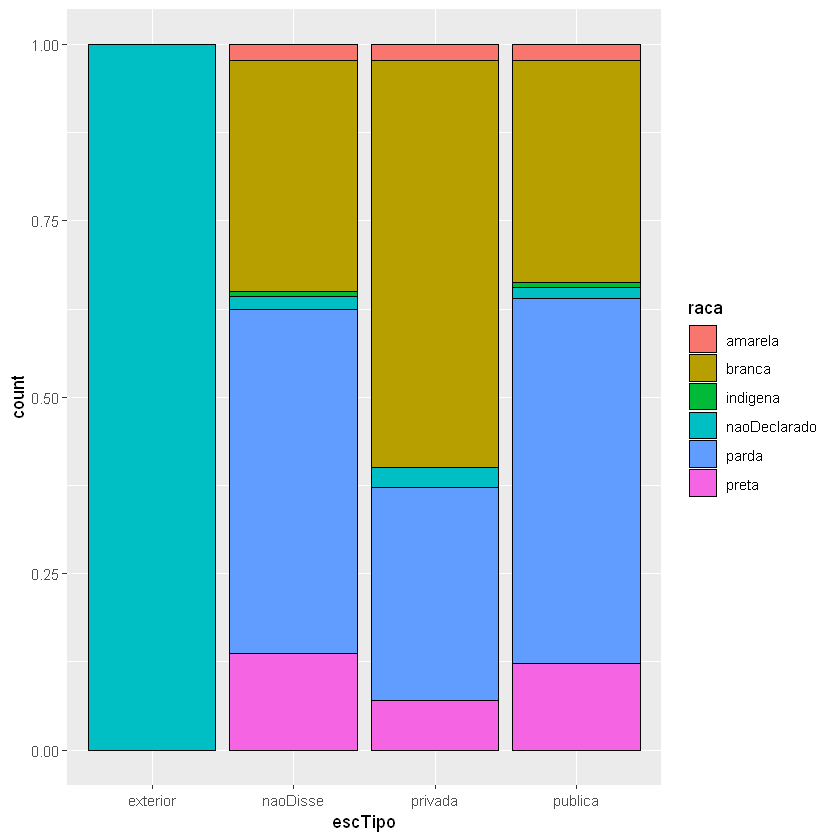

In [22]:
df %>% 
    ggplot(aes(escTipo, fill=raca))+
    geom_bar(
        position = 'fill',
        col='black'
    )

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



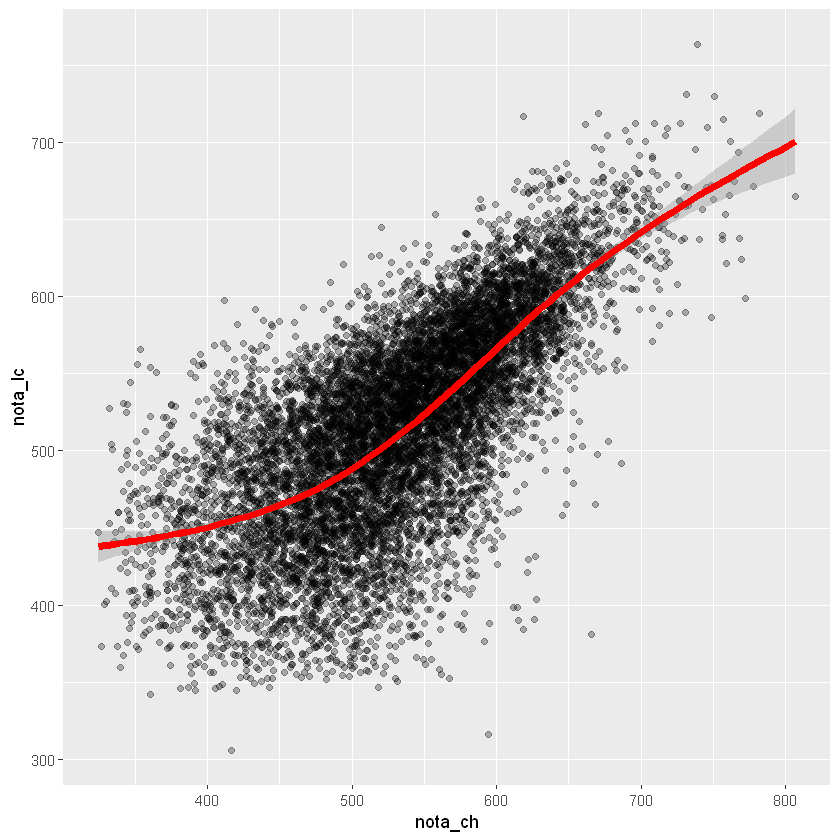

In [31]:
df %>% 
    filter(nota_ch != 0 & nota_lc != 0) %>% 
    ggplot(aes(nota_ch, nota_lc))+
    geom_point(alpha=.3)+
    #geom_smooth(method = 'lm', col='red', size=2)
    geom_smooth(col='red', size=2)

In [95]:
aux <- df %>% 
    select(nota_cn:nota_mt)

In [96]:
aux <- aux %>% 
    gather(coluna, valor)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 13972 rows containing non-finite values (stat_bin)."


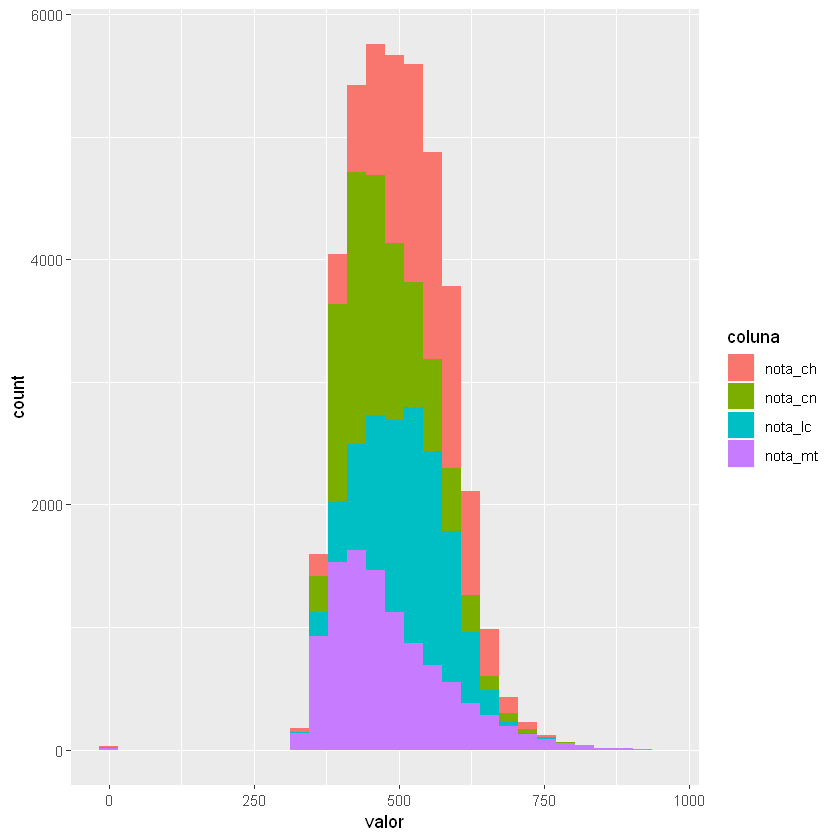

In [46]:
aux %>% 
    ggplot(aes(valor, fill=coluna))+
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



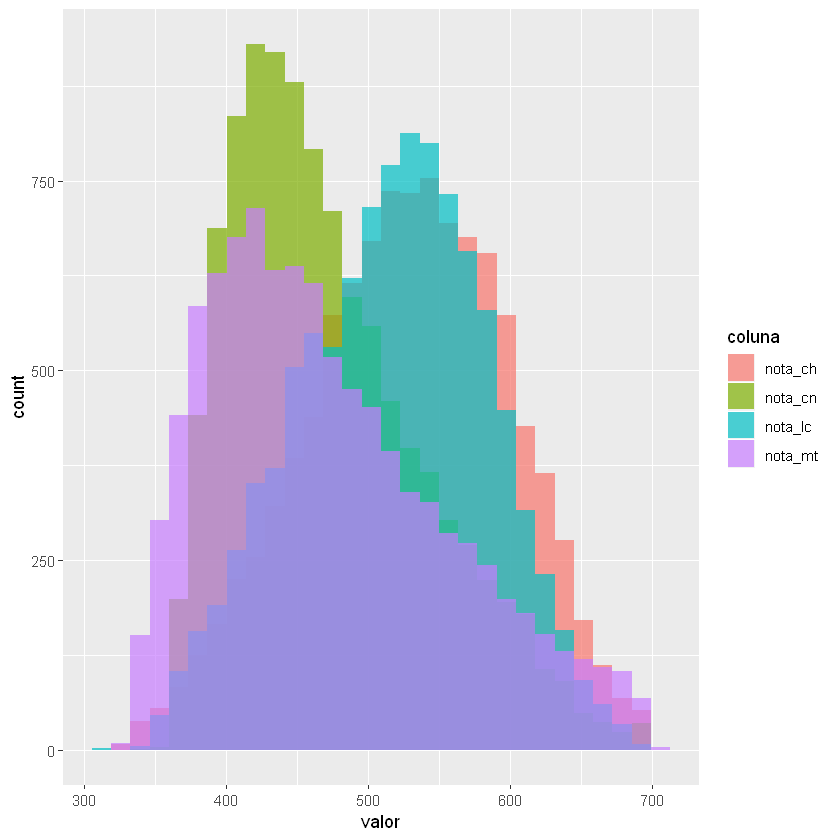

In [53]:
aux %>% 
    filter(valor > 100 & valor < 700) %>% 
    ggplot(aes(valor, fill=coluna))+
    geom_histogram(position = 'identity', alpha=.7)

Warning message:
"Removed 13972 rows containing non-finite values (stat_density)."


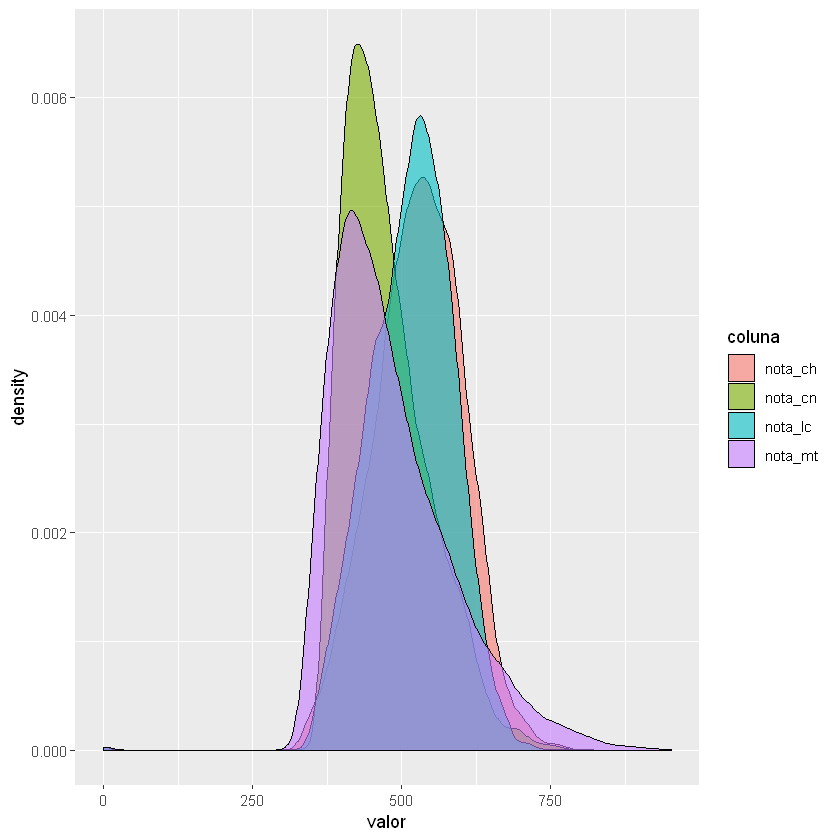

In [57]:
aux %>% 
    #filter(valor > 100 & valor < 700) %>% 
    ggplot(aes(valor, fill=coluna))+
    geom_density(alpha=.6)

Warning message:
"Removed 13972 rows containing non-finite values (stat_density)."


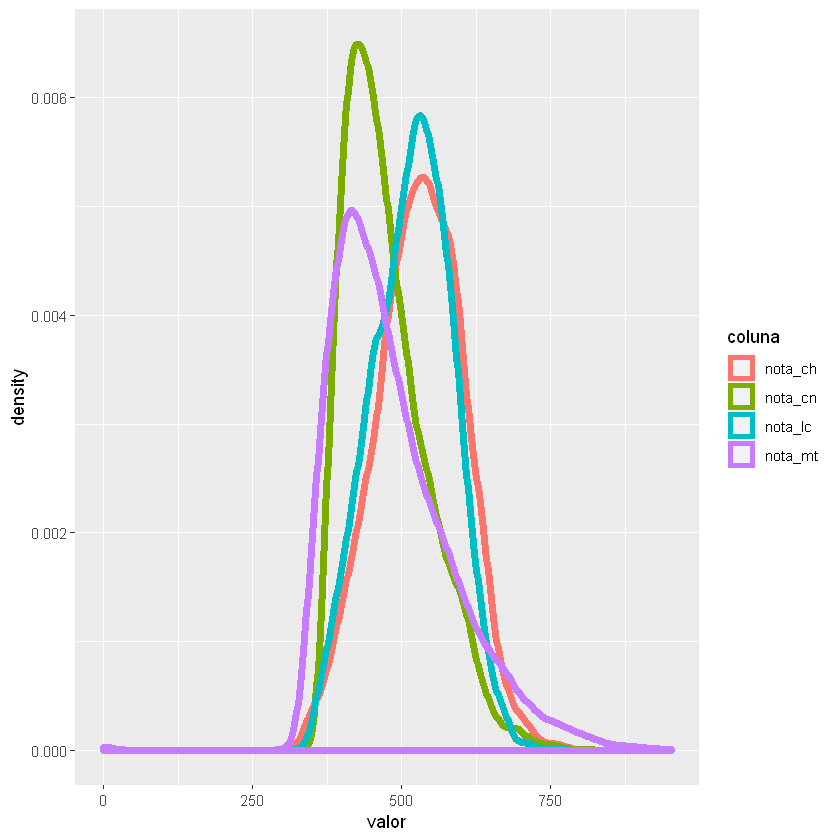

In [98]:
aux %>% 
    #filter(valor > 100 & valor < 700) %>% 
    ggplot(aes(valor, col=coluna))+
    geom_density(alpha=.6, size=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 13972 rows containing non-finite values (stat_bin)."


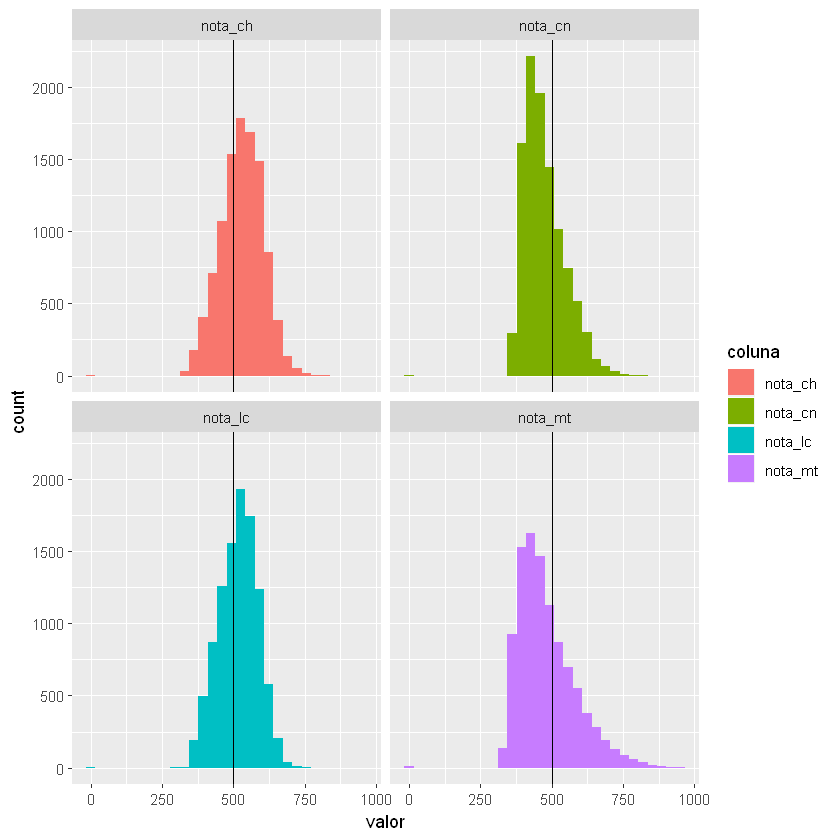

In [38]:
aux %>% 
    ggplot(aes(valor, fill=coluna))+
    geom_histogram()+
    geom_vline(xintercept = 500)+
    facet_wrap(~ coluna)

In [ ]:
aux %>% 
    ggplot(aes(valor, fill=coluna))+
    geom_histogram()+
    geom_vline(xintercept = 500)+
    facet_wrap(~ coluna)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 13972 rows containing non-finite values (stat_bin)."


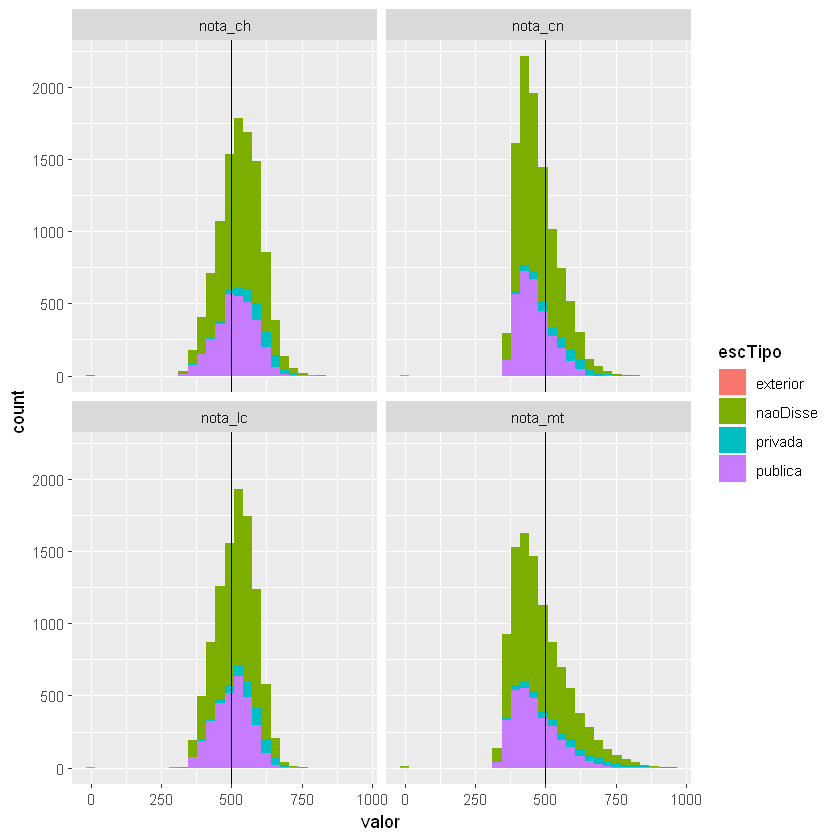

In [41]:
df %>% 
    select(nota_cn:nota_mt, escTipo) %>% 
    gather(coluna, valor, -escTipo) %>% 
    ggplot(aes(valor, fill=escTipo))+
    geom_histogram()+
    geom_vline(xintercept = 500)+
    facet_wrap(~ coluna)

Warning message:
"Removed 3597 rows containing non-finite values (stat_boxplot)."


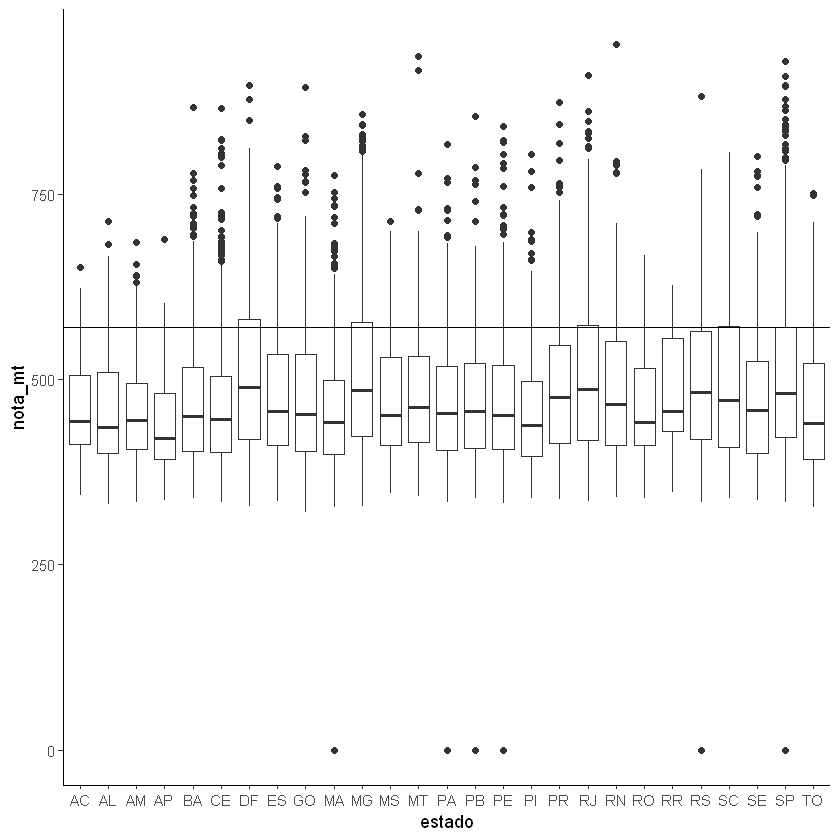

In [62]:
df %>% 
    ggplot(aes(estado, nota_mt))+
    geom_boxplot()+
    geom_hline(yintercept = 570)+
    theme_classic()

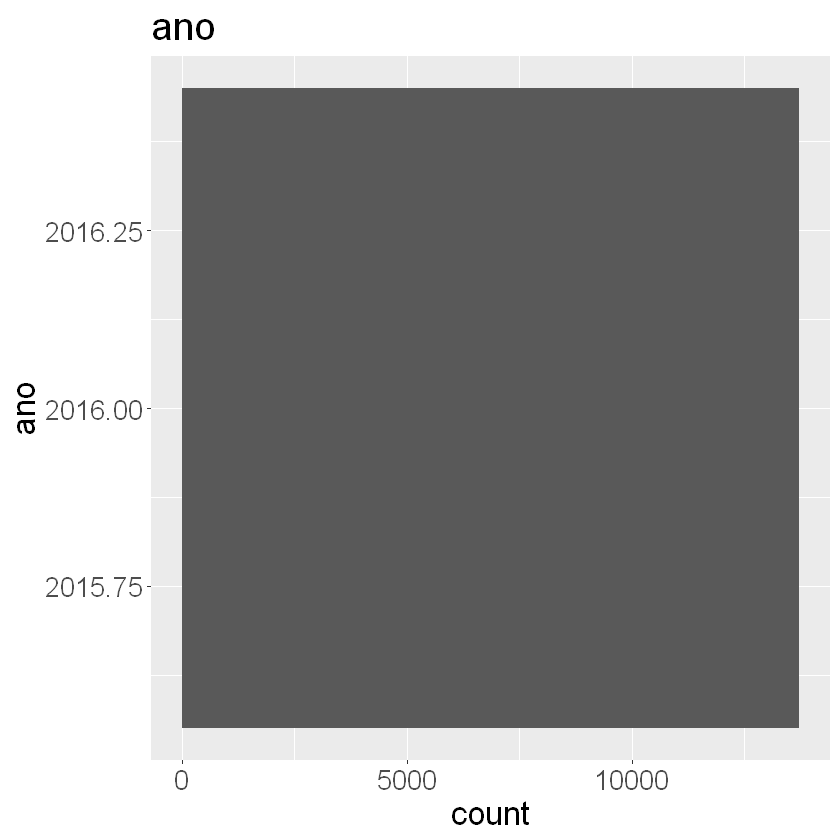

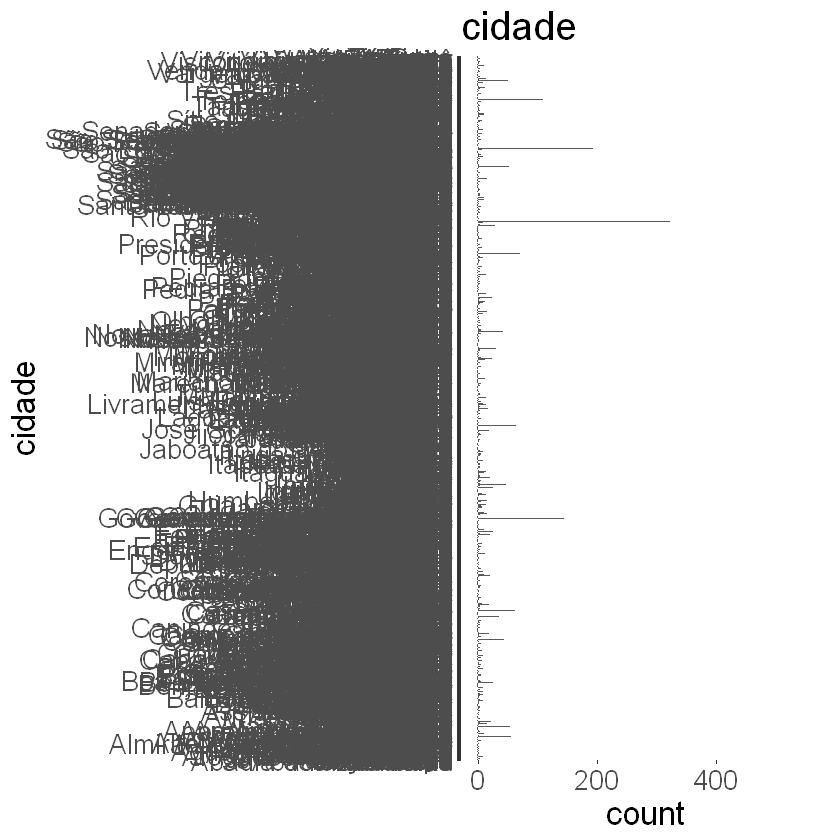

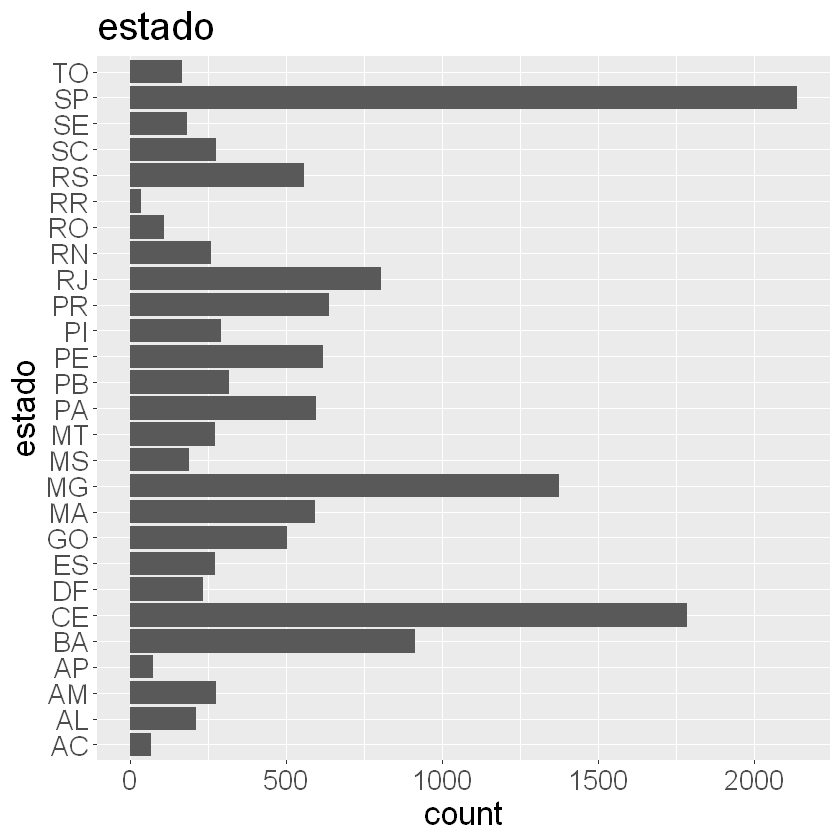

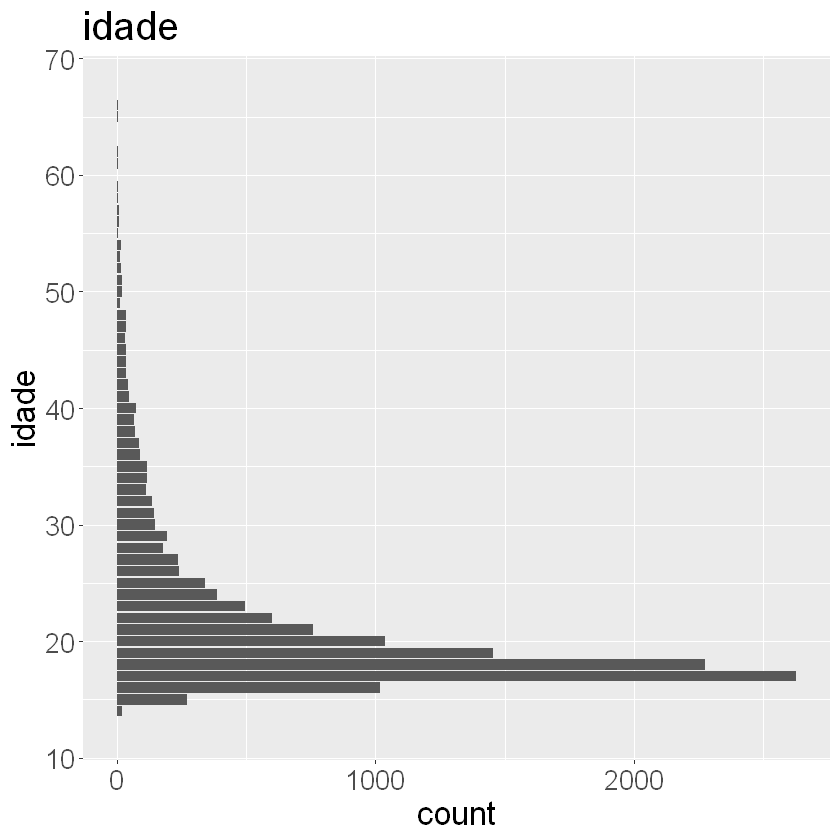

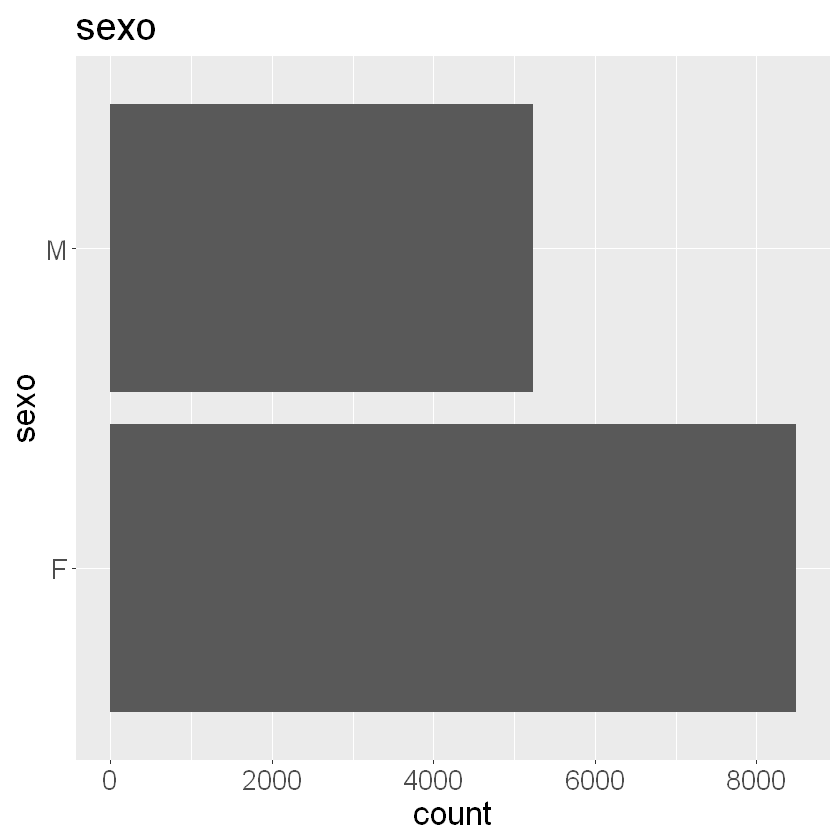

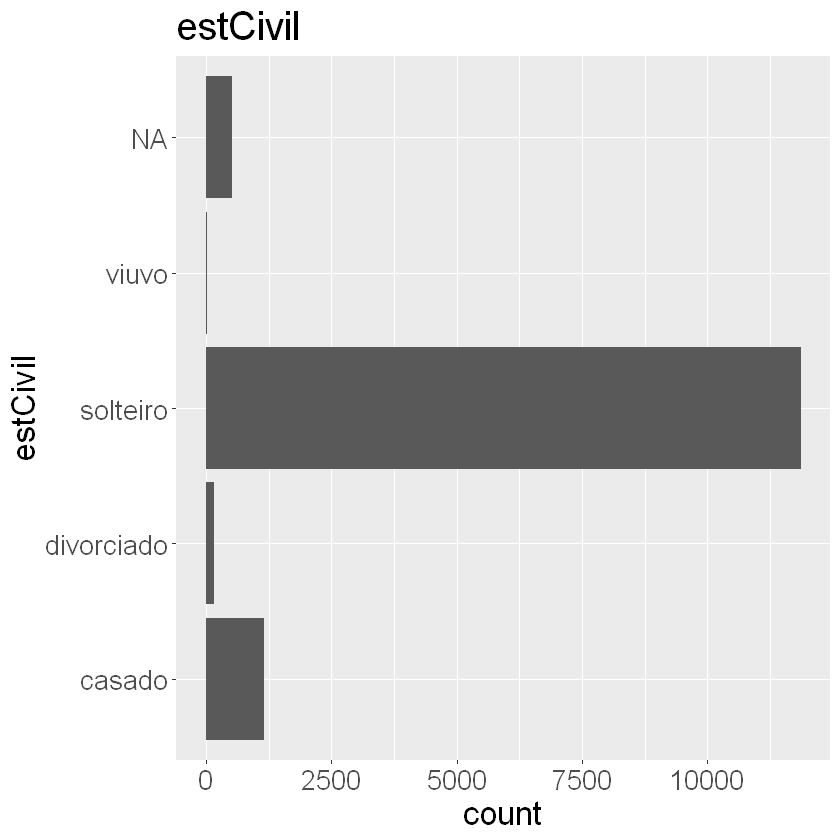

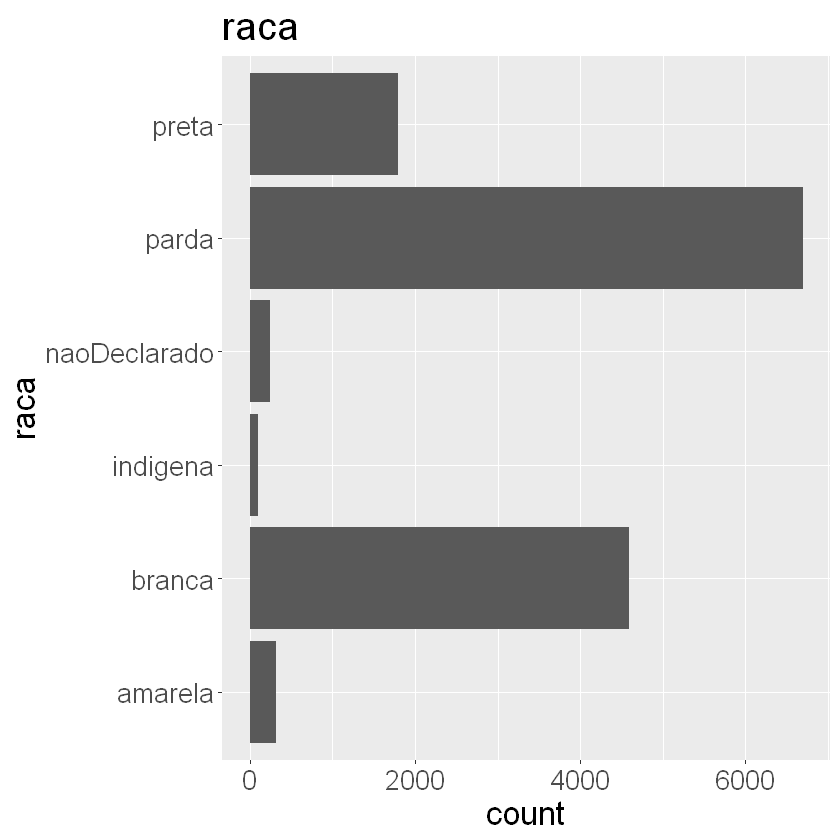

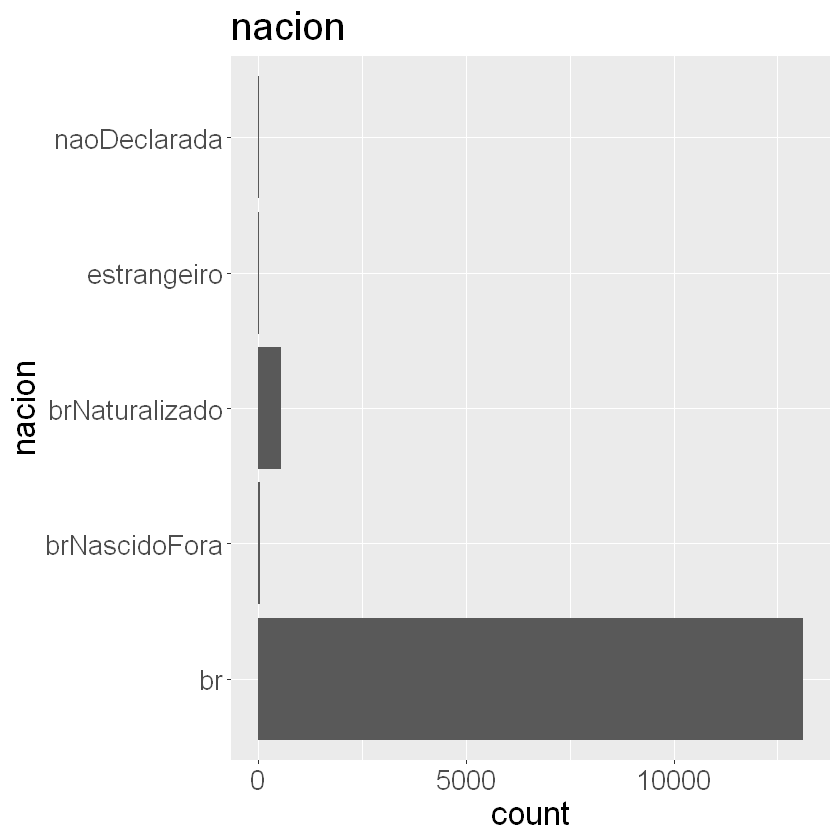

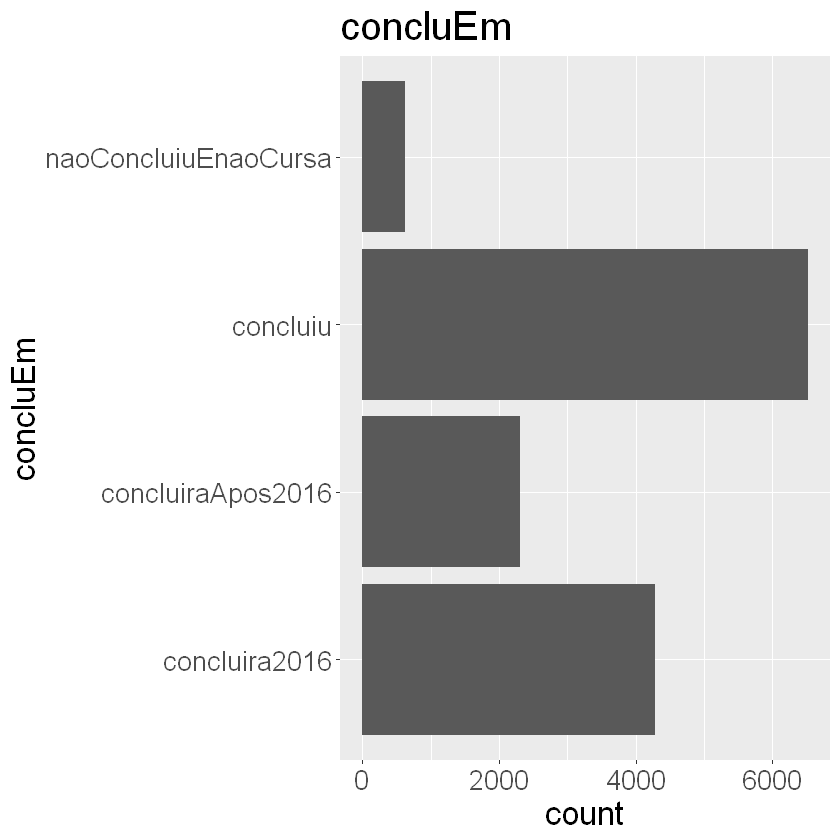

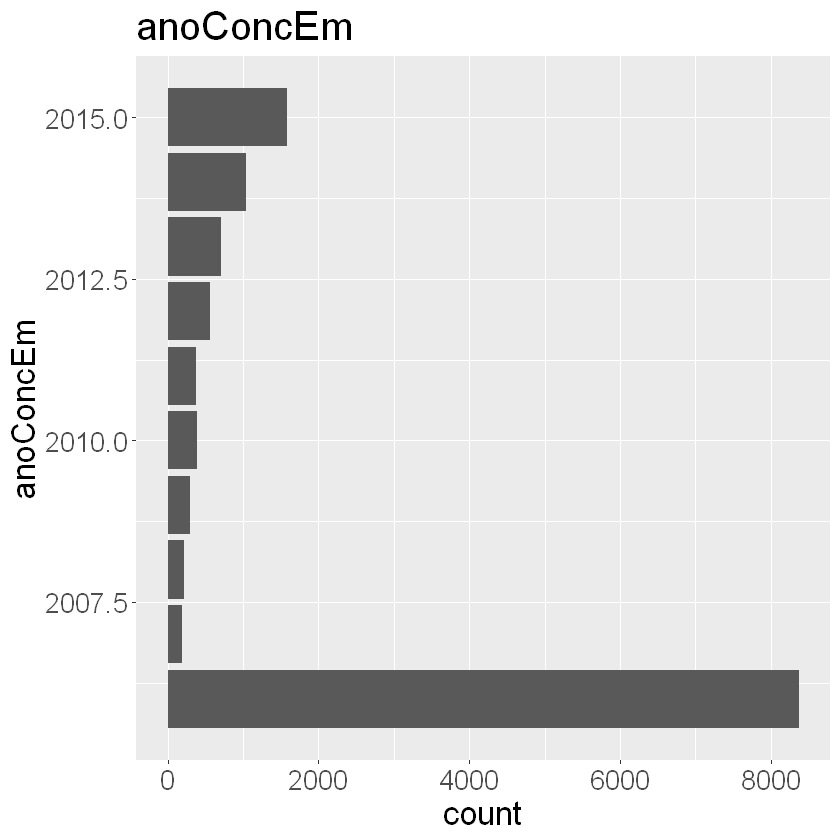

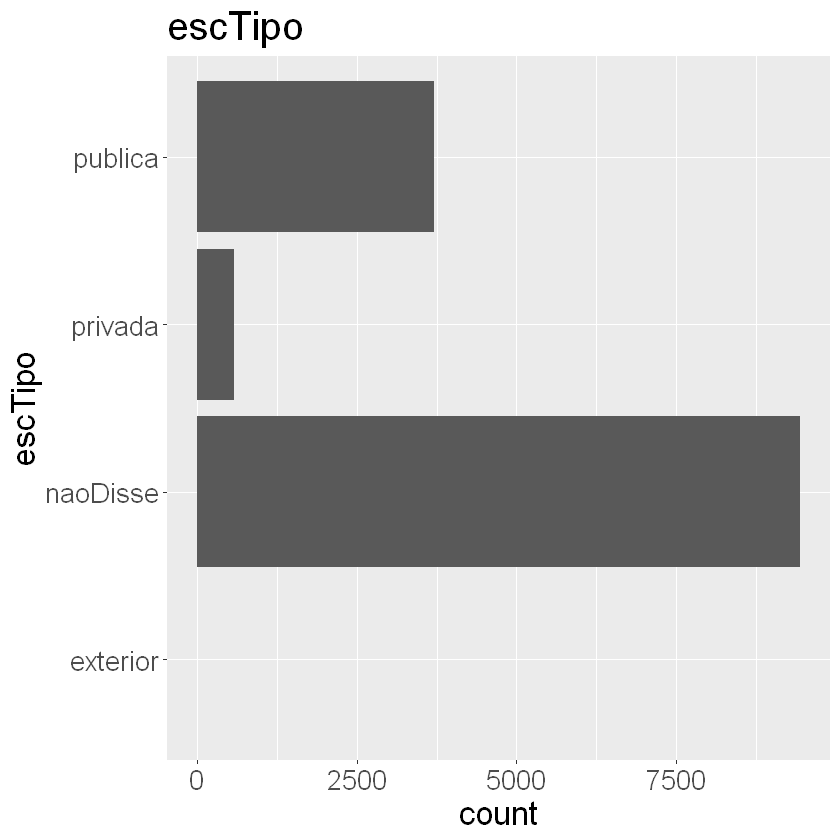

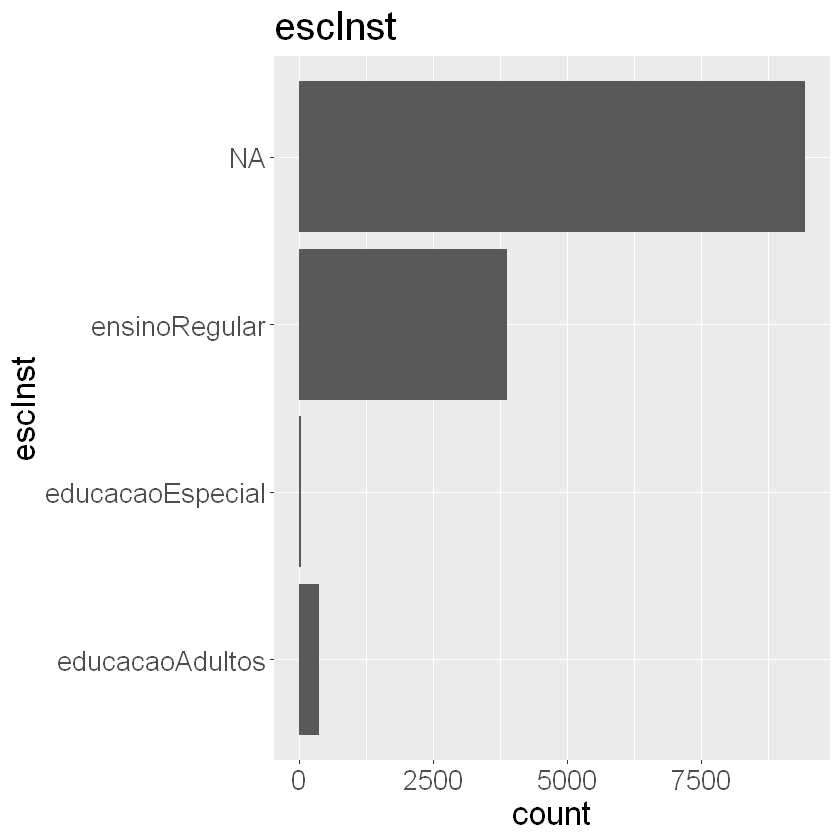

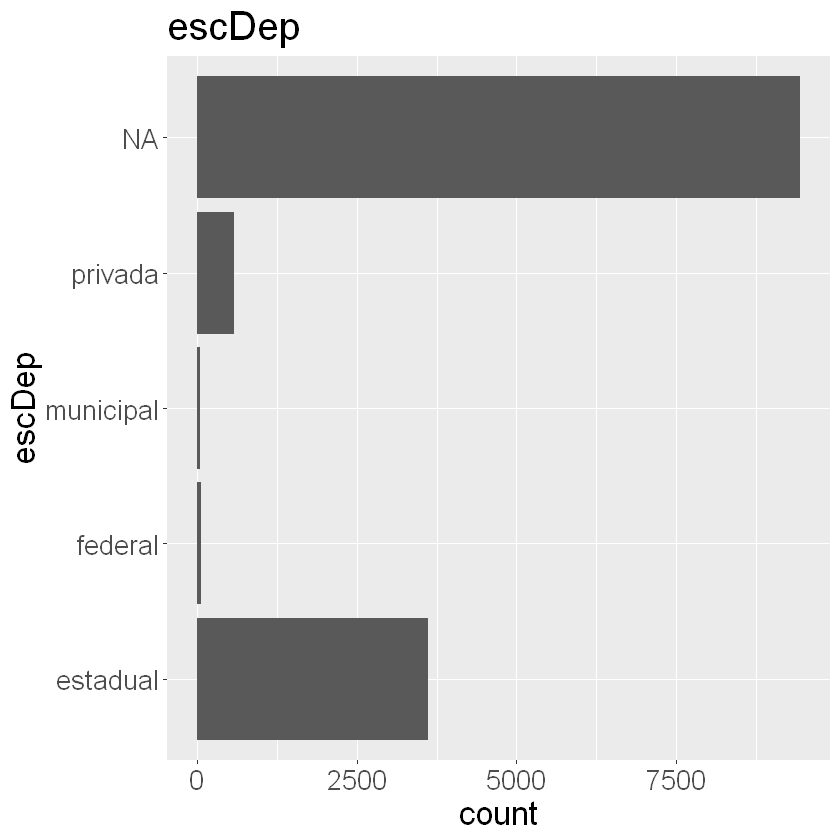

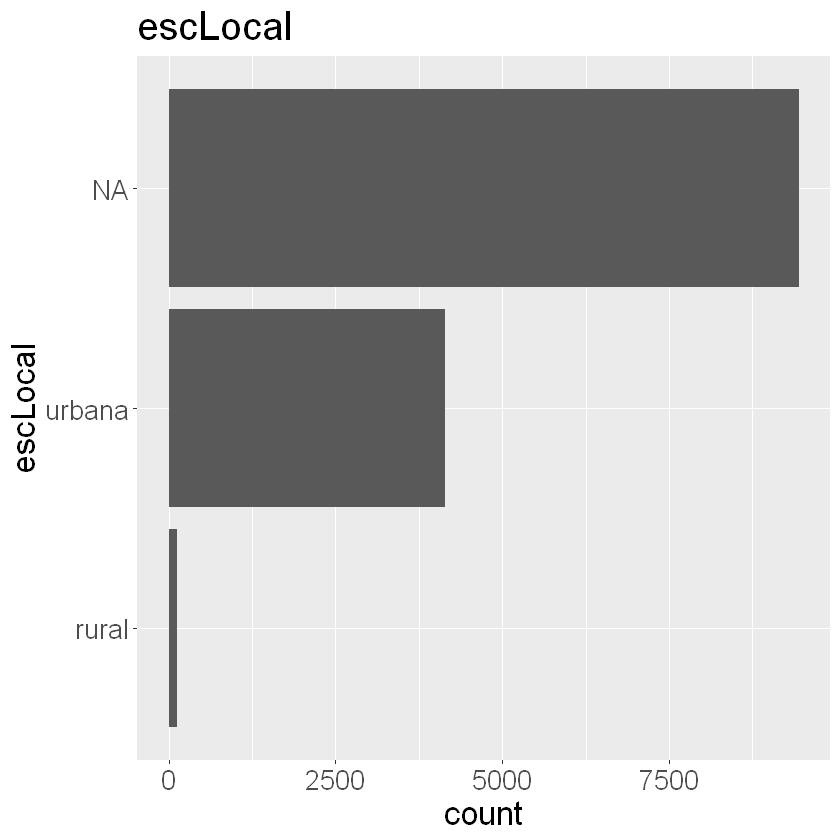

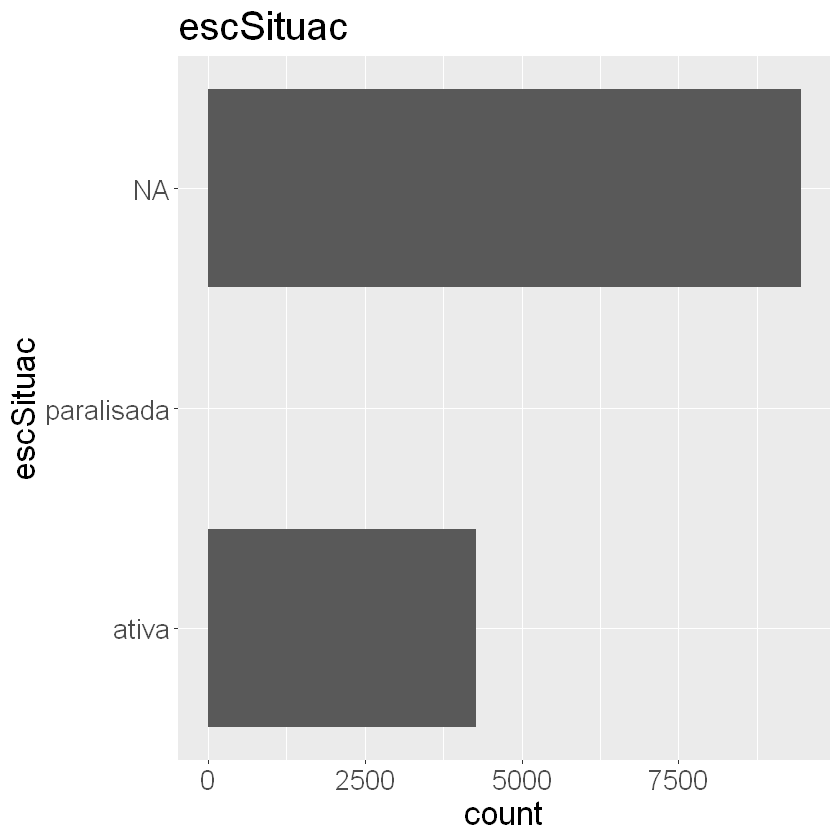

In [72]:
aux <- df %>% 
    select(ano:escSituac) 

for(coluna in names(aux)){
    
    plot <- aux %>% 
        ggplot(aes_string(coluna))+
        geom_bar()+
        labs(title = coluna)+
        coord_flip()+
        theme(text = element_text(size = 20))
    
    print(plot)
    
    
}


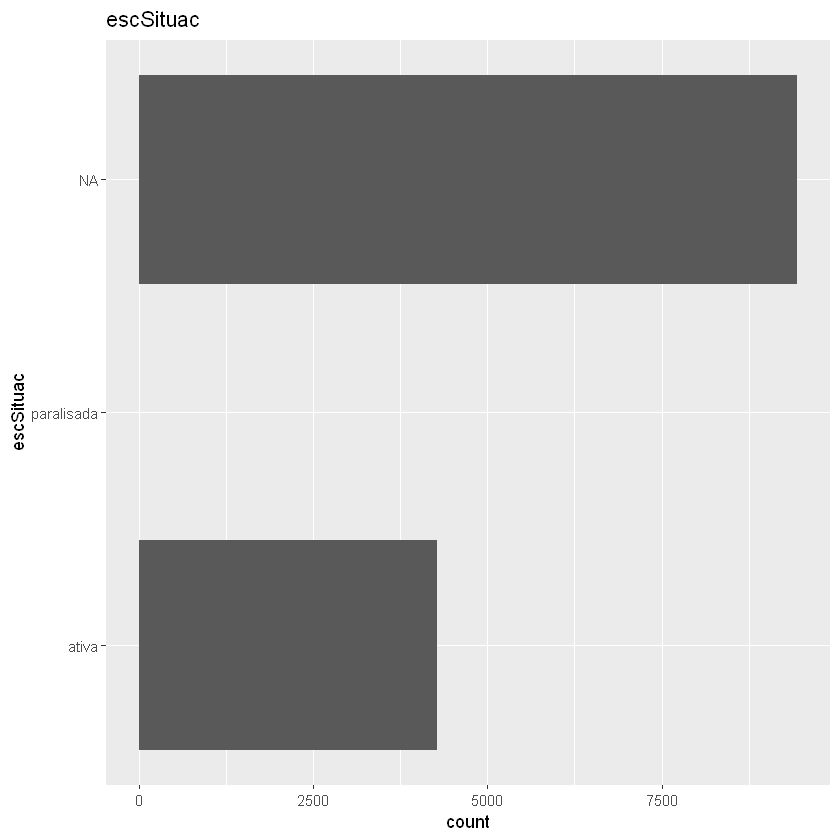

In [68]:
a

In [86]:
df %>% 
    mutate(
        notaTot = nota_cn + nota_ch + nota_lc + nota_mt + nota_redaTot,
        notaTot = notaTot/5
    ) %>% 
    select(starts_with('nota'), -(nota_reda1:nota_reda5))

nota_cn,nota_ch,nota_lc,nota_mt,nota_redaTot,notaTot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
436.3,495.4,581.2,399.4,520,486.46
474.5,544.1,599.0,459.8,580,531.48
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
439.7,583.2,410.9,364.5,620,483.66
420.1,604.2,484.5,529.2,560,519.60
619.6,625.8,611.2,566.7,620,608.66
500.5,555.2,521.8,372.4,680,525.98


In [87]:
df <- df %>% 
    mutate(
        notaTot = nota_cn + nota_ch + nota_lc + nota_mt + nota_redaTot,
        notaTot = notaTot/5
    )

Warning message:
"Removed 3633 rows containing non-finite values (stat_ydensity)."


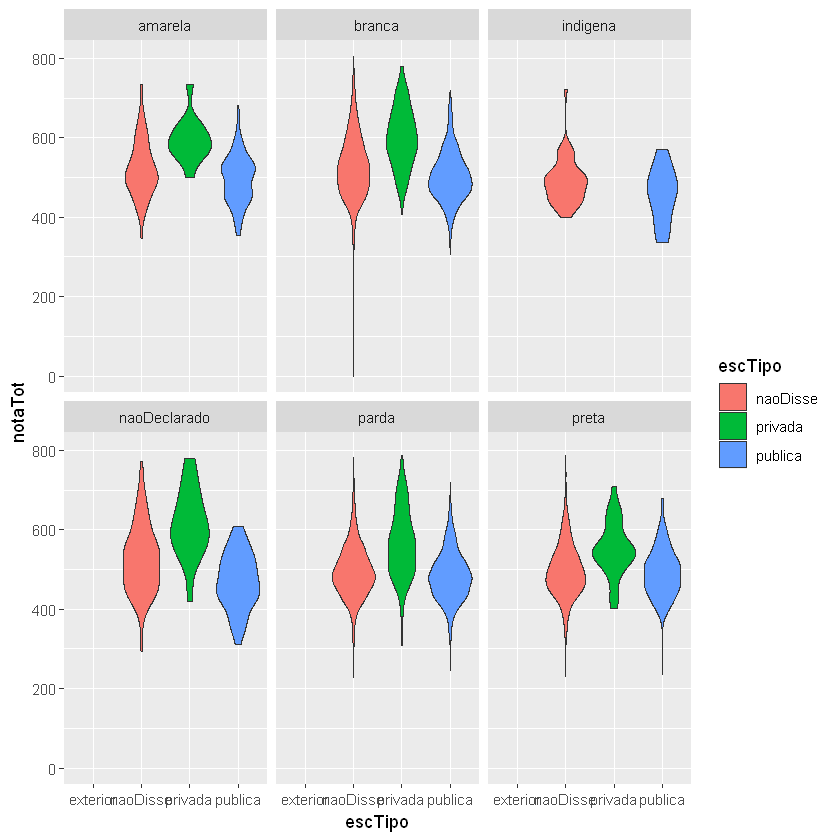

In [92]:
df %>% 
    ggplot(aes(escTipo, notaTot, fill=escTipo))+
    geom_violin()+
    facet_wrap(~ raca)

In [88]:
head(descricaoDf, 100)

nome_coluna,descricao_colua
<chr>,<chr>
id,Número de inscrição
ano,Ano do Enem
cidade,Nome do município de residência
estado,Sigla da Unidade da Federação de residência
idade,idade
sexo,sexo
estCivil,Estado Civil
raca,Cor/raça
nacion,nacionalidade


In [100]:
head(df)

id,ano,cidade,estado,idade,sexo,estCivil,raca,nacion,concluEm,anoConcEm,escTipo,escInst,escDep,escLocal,escSituac,prens_cn,prens_ch,prens_lc,prens_mt,nota_cn,nota_ch,nota_lc,nota_mt,tipoLing,statuReda,nota_reda1,nota_reda2,nota_reda3,nota_reda4,nota_reda5,nota_redaTot,sociEco_escPai,sociEco_escMae,sociEco_ocupPai,sociEco_ocupMae,sociEco_numPessRes,sociEco_renda,notaTot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,Porto Alegre,RS,24,M,solteiro,branca,br,concluiu,2012,naoDisse,NA,NA,NA,NA,presente,presente,presente,presente,436.3,495.4,581.2,399.4,espanhol,semProblema,120,120,120,80,80,520,3,3,1,1,3,2,486.46
2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,Granja,CE,17,F,solteiro,parda,br,concluira2016,2006,publica,ensinoRegular,estadual,urbana,ativa,presente,presente,presente,presente,474.5,544.1,599.0,459.8,espanhol,semProblema,140,120,120,120,80,580,0,0,0,0,5,1,531.48
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,Fortaleza,CE,21,F,solteiro,parda,br,concluiraApos2016,2006,naoDisse,NA,NA,NA,NA,faltou,faltou,faltou,faltou,NA,NA,NA,NA,espanhol,NA,NA,NA,NA,NA,NA,NA,3,3,1,1,4,2,NA
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,Rio de Janeiro,RJ,25,F,solteiro,naoDeclarado,br,concluiu,2007,naoDisse,NA,NA,NA,NA,faltou,faltou,faltou,faltou,NA,NA,NA,NA,ingles,NA,NA,NA,NA,NA,NA,NA,7,4,3,1,4,4,NA
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,Manaus,AM,28,M,solteiro,preta,br,concluiu,2012,naoDisse,NA,NA,NA,NA,faltou,faltou,faltou,faltou,NA,NA,NA,NA,espanhol,NA,NA,NA,NA,NA,NA,NA,4,3,2,2,4,2,NA
a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,Aracatu,BA,18,F,solteiro,branca,br,concluiu,2015,naoDisse,NA,NA,NA,NA,presente,presente,presente,presente,439.7,583.2,410.9,364.5,ingles,semProblema,120,120,120,160,100,620,4,4,3,0,5,2,483.66


Warning message:
"Removed 3633 rows containing non-finite values (stat_binhex)."


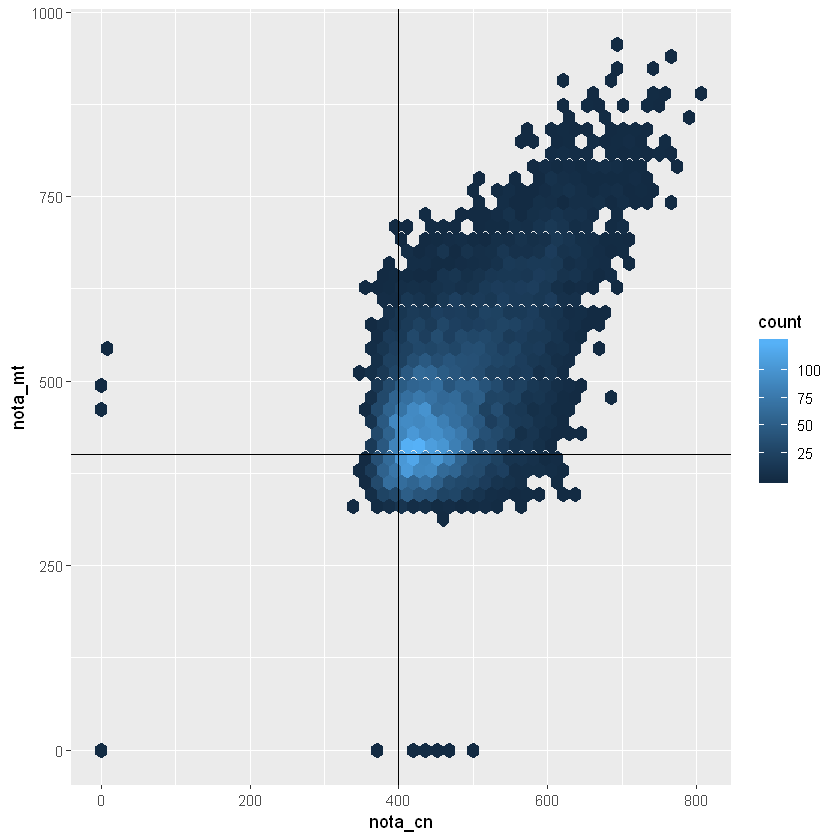

In [105]:
# install.packages("hexbin")
df %>% 
    ggplot(aes(nota_cn, nota_mt))+
    geom_hex(bins=50)+
    geom_vline(xintercept = 400)+
    geom_hline(yintercept = 400)

In [109]:
library(brazilmaps)

In [110]:
mapa <- get_brmap("Region")
glimpse(mapa)

Observations: 5
Variables: 4
$ seq      <int> 1, 2, 3, 4, 5
$ Region   <dbl> 1, 2, 3, 4, 5
$ desc_rg  <fct> NORTE, NORDESTE, SUDESTE, SUL, CENTRO-OESTE
$ geometry <list> [-46.11427458, -46.19830591, -46.22369164, -46.37016654, ...


In [111]:
mapa <- get_brmap("State", geo.filter = list(State = 35))
glimpse(mapa)

Observations: 1
Variables: 4
$ nome     <fct> SÃO PAULO
$ State    <dbl> 35
$ Region   <dbl> 3
$ geometry <MULTIPOLYGON> MULTIPOLYGON (((-45.32898 -...


In [112]:
mapa <- get_brmap("State")
glimpse(mapa)

Observations: 27
Variables: 4
$ nome     <fct> RONDÔNIA, ACRE, AMAZONAS, RORAIMA, PARÁ, AMAPÁ, TOCANTINS,...
$ State    <dbl> 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28...
$ Region   <dbl> 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3...
$ geometry <MULTIPOLYGON [°]> MULTIPOLYGON (((-61.58313 -..., MULTIPOLYGON ...


In [121]:
 estadosDf <- mapa %>%
    select(nome) %>% 
    as_tibble() %>% 
    count(nome) %>% 
    arrange(nome) %>% 
    mutate(
        sigla = c('AC','AL','AP','AM','BA','CE','DF','ES',
                    'GO','MA','MT','MS','MG','PA','PB','PR','PE','PI',
                     'RJ','RN','RS','RO','RR','SC','SP','SE','TO')
    ) %>% 
    select(-n)



In [122]:
estadosDf

nome,sigla
<fct>,<chr>
ACRE,AC
ALAGOAS,AL
AMAPÁ,AP
AMAZONAS,AM
BAHIA,BA
CEARÁ,CE
DISTRITO FEDERAL,DF
ESPÍRITO SANTO,ES
GOIÁS,GO


In [124]:
 quantSexo <- df %>% 
    count(estado, sexo)

In [125]:
 ufMapa <- get_brmap("State") %>% 
    inner_join(estadosDf)

Joining, by = "nome"


In [128]:
glimpse(ufMapa)

Observations: 27
Variables: 5
$ nome     <fct> RONDÔNIA, ACRE, AMAZONAS, RORAIMA, PARÁ, AMAPÁ, TOCANTINS,...
$ State    <dbl> 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28...
$ Region   <dbl> 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3...
$ sigla    <chr> "RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE"...
$ geometry <MULTIPOLYGON [°]> MULTIPOLYGON (((-61.58313 -..., MULTIPOLYGON ...


In [130]:
ufMapa <- ufMapa %>% 
    inner_join(quantSexo, c('sigla'='estado'))

In [131]:
glimpse(ufMapa)

Observations: 54
Variables: 7
$ nome     <fct> RONDÔNIA, RONDÔNIA, ACRE, ACRE, AMAZONAS, AMAZONAS, RORAIM...
$ State    <dbl> 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 21...
$ Region   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2...
$ sigla    <chr> "RO", "RO", "AC", "AC", "AM", "AM", "RR", "RR", "PA", "PA"...
$ sexo     <chr> "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"...
$ n        <int> 66, 42, 43, 24, 168, 106, 19, 14, 366, 228, 51, 22, 103, 6...
$ geometry <MULTIPOLYGON [°]> MULTIPOLYGON (((-61.58313 -..., MULTIPOLYGON ...


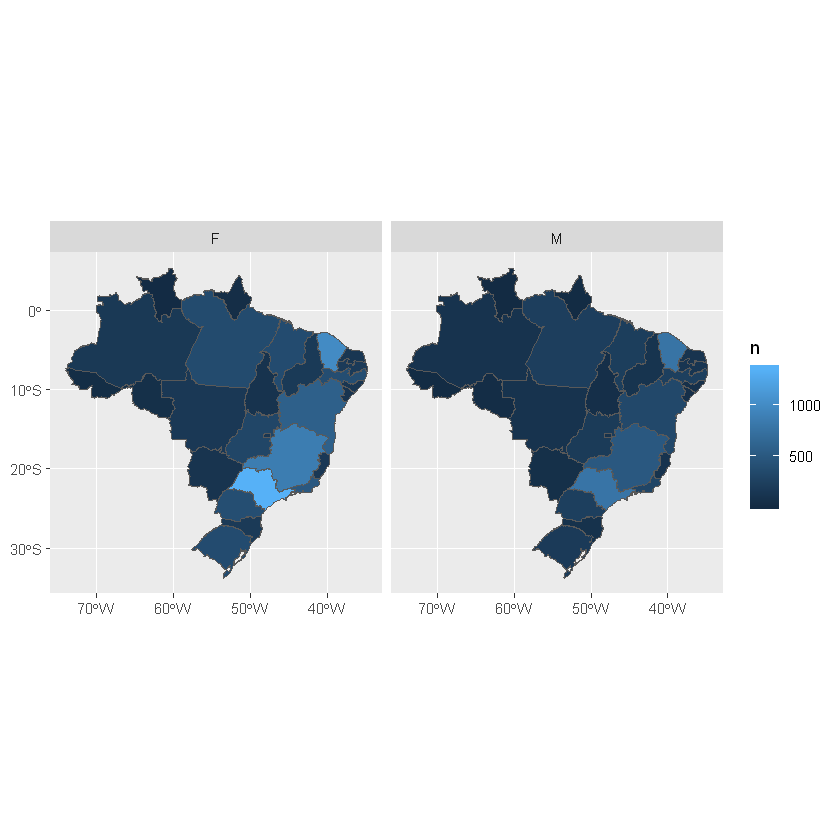

In [134]:
ufMapa %>% 
    ggplot()+
    geom_sf(aes(fill = n))+
    facet_wrap(~ sexo)

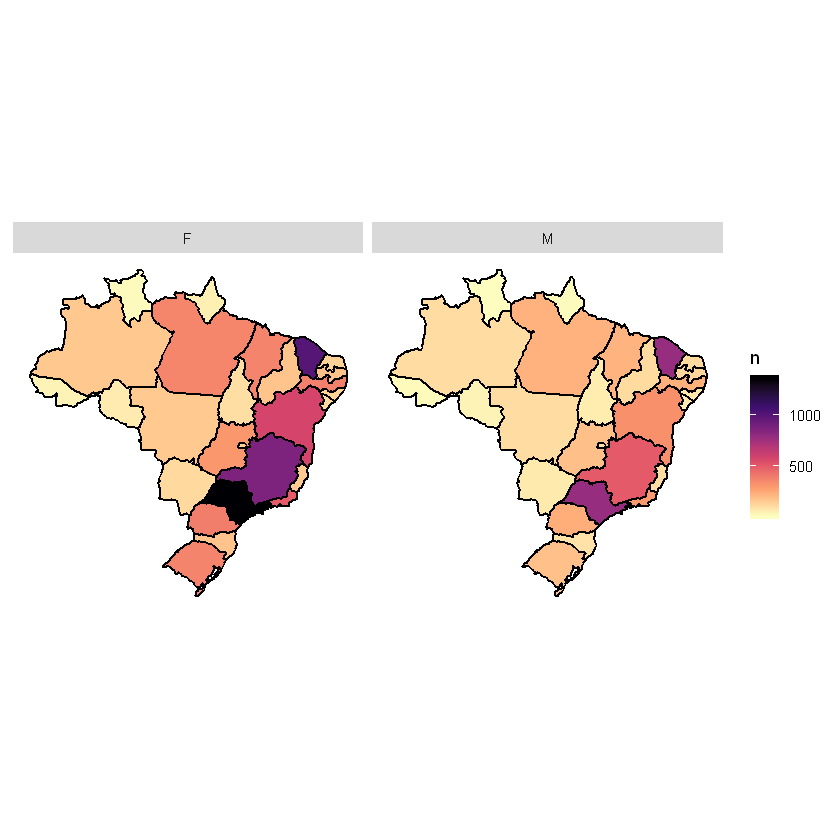

In [141]:
ufMapa %>% 
    ggplot()+
  geom_sf(aes(fill = n), 
          # ajusta tamanho das linhas
          colour = "black", size = .7) +
#   geom_sf(data = get_brmap("State"),
#           fill = "transparent",
#           colour = "black", size = 0.5) +
  facet_wrap(~ sexo)+
  # muda escala de cores
  scale_fill_viridis_c(option = 2, direction = -1) +
  # tira sistema cartesiano
  theme(panel.grid = element_line(colour = "transparent"),
        panel.background = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank())